Name: **`*GHULAM QADIR*`**

CMS-ID: 023-22-0126

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(150,150,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

outputs = layers.Dense(6, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,556,806 (21.20 MB)

 Trainable params: 5,556,806 (21.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
base_dir = '/content/drive/My Drive/Datasets/Train_Test_CNN'

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical'
)

val_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical'
)

test_dataset = image_dataset_from_directory(
    base_dir+'/test',
    image_size=(150, 150),
    batch_size=32,
    label_mode = 'categorical'
)

Found 864 files belonging to 6 classes.
Using 600 files for training.
Found 864 files belonging to 6 classes.
Using 264 files for validation.
Found 389 files belonging to 6 classes.


In [12]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=16
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.6025 - loss: 0.9862 - val_accuracy: 0.5985 - val_loss: 1.1269
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.6407 - loss: 0.8880 - val_accuracy: 0.5833 - val_loss: 1.0355
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7155 - loss: 0.8076 - val_accuracy: 0.6023 - val_loss: 1.1653
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6797 - loss: 0.7849 - val_accuracy: 0.6515 - val_loss: 1.0991
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7570 - loss: 0.6250 - val_accuracy: 0.5947 - val_loss: 1.2019
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.7826 - loss: 0.5817 - val_accuracy: 0.6553 - val_loss: 1.1977
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7961 - loss: 0.5032 - val_accuracy: 0.5871 - val_loss: 1.3824
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8041 - loss: 0.5263 - val_accuracy: 0.

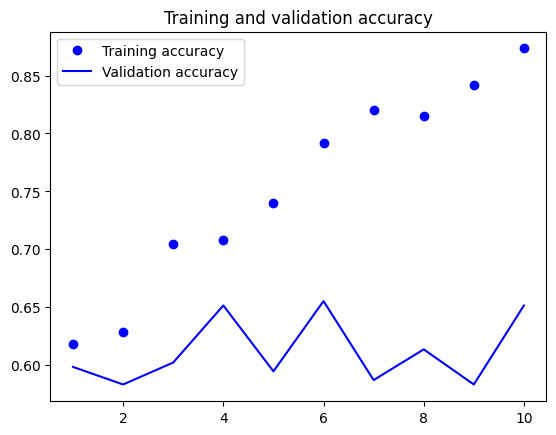

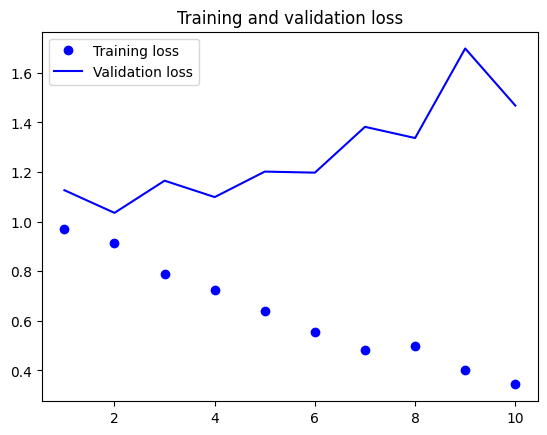

In [13]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.5977 - loss: 1.6578
Test accuracy: 0.589


In [20]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [21]:
inputs = keras.Input(shape=(150,150,3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=64
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5172 - loss: 1.1784 - val_accuracy: 0.4773 - val_loss: 1.5222
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.5304 - loss: 1.1187 - val_accuracy: 0.5379 - val_loss: 1.1326
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.5145 - loss: 1.2326 - val_accuracy: 0.5568 - val_loss: 1.1930
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5885 - loss: 1.0627 - val_accuracy: 0.4924 - val_loss: 1.3382
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5355 - loss: 1.1370 - val_accuracy: 0.5530 - val_loss: 1.1541
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.5222 - loss: 1.0769 - val_accuracy: 0.5606 - val_loss: 1.1400
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.5786 - loss: 1.0782 - val_accuracy: 0.5189 - val_loss: 1.3417
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.5551 - loss: 1.0975 - val_accuracy: 0.

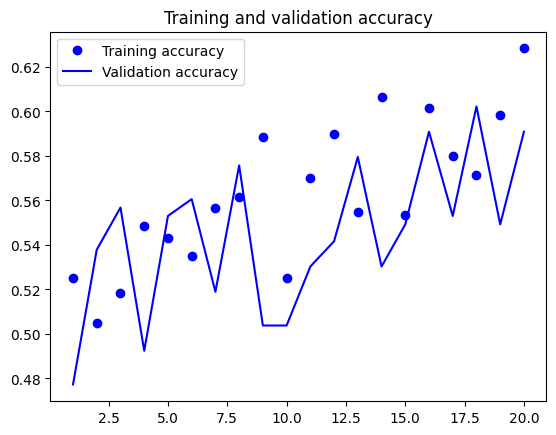

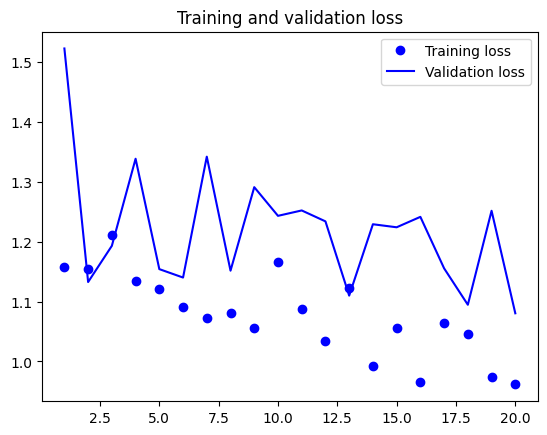

In [25]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4663 - loss: 1.4792
Test accuracy: 0.504
